# 스케일링 실습

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [3]:
# 타이타닉 데이터
titanic = pd.read_csv('C:/Users/LOVE/Downloads/vscode/ML/titanic/train.csv')

titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


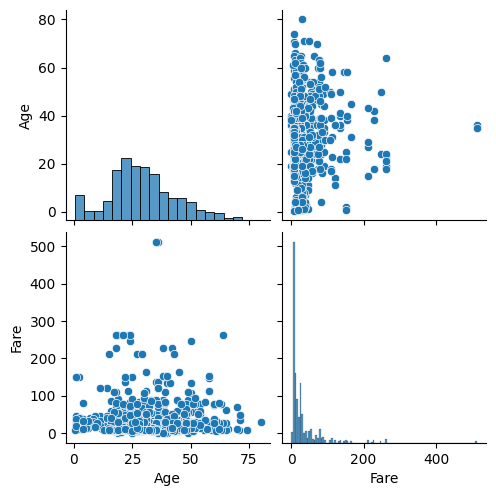

In [7]:
sns.pairplot(titanic[['Age', 'Fare']])

In [13]:
titanic[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mnmx = MinMaxScaler()
stnd = StandardScaler()

## 1. MinMaxScaler: 나이(Age)

In [15]:
age_mean = titanic[['Age']].mean().round(2)
titanic['Age_mean'] = titanic['Age'].fillna(age_mean)

In [18]:
titanic['Age_mean_mnmx'] = mnmx.fit_transform(titanic[['Age_mean']])
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_mean_mnmx
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0.321438


## 2. StandardScaler: 요금(Fare)

In [19]:
titanic['Fare_stnd'] = stnd.fit_transform(titanic[['Fare']])
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_mean_mnmx,Fare_stnd
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,0.271174,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0.472229,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0.321438,-0.488854


## 3. 데이터 확인

<Axes: xlabel='Age_mean_mnmx', ylabel='Count'>

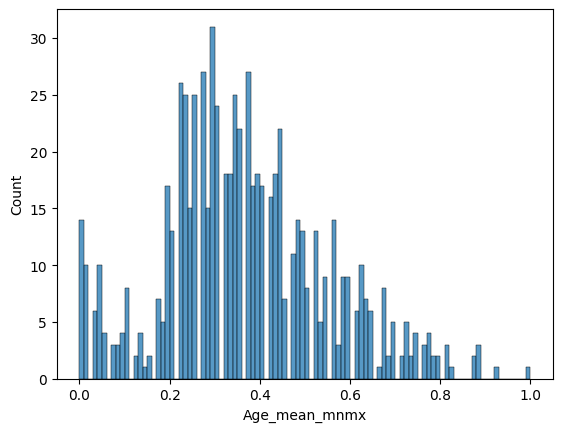

In [24]:
sns.histplot(titanic['Age_mean_mnmx'], bins = 100)

<Axes: xlabel='Fare_stnd', ylabel='Count'>

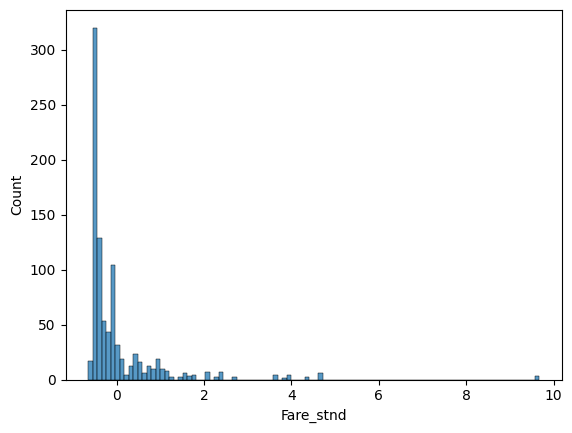

In [25]:
sns.histplot(titanic['Fare_stnd'], bins = 100)